In [1]:
using Pkg

In [2]:
Pkg.activate("../")

  Activating project at `~/Julia_learning_repo/Yao_QC_learning/LS_EDF_QC`


In [3]:
using Yao
using YaoPlots

In [4]:
using StatsBase: Histogram, fit
using BitBasis

In [5]:
using Plots: bar, scatter!, gr; gr()

Plots.GRBackend()

## 1. Splitting information into bits

The first thing we need to know about is the idea of bits. These are designed to be the world’s simplest alphabet. With only two characters, 0 and 1, we can represent any piece of information.

One example is numbers. You are probably used to representing a number through a string of the ten digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain power of ten. For example, when we write 9213, we mean

$$ 9000 + 200 + 10 + 3 $$

or, expressed in a way that emphasizes the powers of ten

$$ (9 \times 10^{3}) + (2 \times 10^{2}) + (1 \times 10^{1}) + (3 \times 10^{0}) $$

Though we usually use this system based on the number 10, we can just as easily use one based on any other number. The binary number system, for example, is based on the number two. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 9213 becomes 10001111111101, since

$$ 9213 = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) + (1 \times 2^{9}) + (1 \times 2^{8}) + (1 \times 2^{7}) + (1 \times 2^{6}) + (1 \times 2^{5}) + (1 \times 2^{4}) + (1 \times 2^{3}) + (1 \times 2^{2}) + (0 \times 2^{1}) + (1 \times 2^{0})$$  

In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc.



In [6]:
bitstring(Int16(5))

"0000000000000101"

In [7]:
digits(5, base=2, pad=5)

5-element Vector{Int64}:
 1
 0
 1
 0
 0

These strings of bits, known as binary strings, can be used to represent more than just numbers. For example, there is a way to represent any text using bits. For any letter, number, or punctuation mark you want to use, you can find a corresponding string of at most eight bits using this table. Though these are quite arbitrary, this is a widely agreed-upon standard. In fact, it's what was used to transmit this article to you through the internet.

This is how all information is represented in computers. Whether numbers, letters, images, or sound, it all exists in the form of binary strings.

Like our standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use qubits, an extension of the bit to quantum mechanics. In the rest of this textbook, we will explore what qubits are, what they can do, and how they do it. In this section, however, we are not talking about quantum at all. So, we just use qubits as if they were bits.



## 2. Computation as a diagram 

Whether we are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the simplest programs with very few bits, it is useful to represent this process in a diagram known as a circuit diagram. These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called 'gates', mostly for historical reasons.

Here's an example of what a circuit looks like for standard, bit-based computers. You aren't expected to understand what it does. It should simply give you an idea of what these circuits look like.

![gates](https://qiskit.org/textbook/ch-states/images/classical_circuit.png)

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the quantum circuit that represents the same process as above.

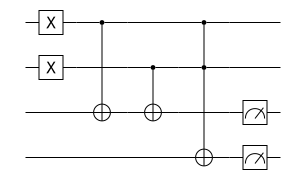

In [8]:
circuit = chain(4, put(1 => X), put(2 => X), control(1, 3 => X),
    control(2, 3 => X), control((1,2),4=>X), Measure(4, locs=3:4))
plot(circuit)

## 3. Your first quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

The extraction of outputs in a quantum circuit is done using an operation called measure_all(). Each measurement tells a specific qubit to give an output to a specific output bit. The command qc_output.measure_all() adds a measurement to each qubit in the circuit qc_output, and also adds some classical bits to write the output to.

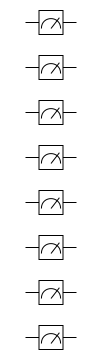

In [9]:
qc_output = chain(8, Measure(8))
plot(qc_output)

Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always 00000000: a 0 from each qubit.

In [10]:
q1 = ArrayReg(bit"00000000")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [11]:
state(q1)

256×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
     ⋮
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [12]:
zero_state(8)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [13]:
a = (q1 |> qc_output -> measure(qc_output, nshots=1024))

1024-element Vector{DitStr{2, 8, Int64}}:
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
            ⋮
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎
 00000000 ₍₂₎

In [18]:
function plotmeasures(x::Array{BitStr{n,Int}, 1}) where n
    hist = fit(Histogram, Int.(x), 0:2^n)
    x = 0
    if (n<=3)
        s=8
    elseif (n>3 && n<=6)
        s=5
    elseif (n>6 && n<=10)
        s=3.2
    elseif (n > 10 && n <=15)
        s=2
    elseif (n>15)
        s=1
    end
    bar(hist.edges[1] .- 0.5, hist.weights, legend=:none, size=(500*(2^n)/s, 400),
        ylims=(0:maximum(hist.weights)), xlims=(0:2^n), grid=:false,
        ticks=false, border=:none, color=:lightblue, lc=:lightblue)
    scatter!(0:2^n-1, ones(2^n, 1), markersize=0,
        series_annotation="|" .* string.(hist.edges[1]; base=2, pad=n) .* "⟩")
    scatter!(0:2^n-1, zeros(2^n, 1) .+ maximum(hist.weights), markersize=0,
        series_annotation=string.(hist.weights))
end

plotmeasures (generic function with 1 method)

In [19]:
plotmeasures(a)

┌ Warning: lims should be a Tuple, not UnitRange{Int64}.
└ @ Plots ~/.julia/packages/Plots/modjX/src/args.jl:1952


┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:1024
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:1024
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple 

##  Creating an Adder Circuit

###  Encoding an input 
Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, it is an operation called x that does the job of the NOT.

Below we create a new circuit dedicated to the job of encoding and call it qc_encode. For now, we only specify the number of qubits.

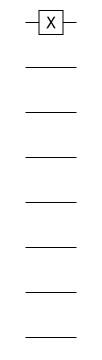

In [122]:
qc_encode = chain(8, put(1 => X))
plot(qc_encode)

Initializing and running this circuits

In [123]:
inpts = zero_state(8)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [124]:
inpts |> qc_encode

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [125]:
res = inpts |> qc_encode -> measure(qc_encode, nshots=2048)

2048-element Vector{DitStr{2, 8, Int64}}:
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
            ⋮
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎
 00000001 ₍₂₎

In [126]:
plotmeasures(res)

┌ Warning: lims should be a Tuple, not UnitRange{Int64}.
└ @ Plots ~/.julia/packages/Plots/modjX/src/args.jl:1952


┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:2048
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:2048
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:256
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple 

Now our computer outputs the string 10000000 instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many  $2^7$s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

Now try out writing another number for yourself. You could do your age, for example. Just use a search engine to find out what the number looks like in binary (if it includes a ‘0b’, just ignore it), and then add some 0s to the left side if you are younger than 128.

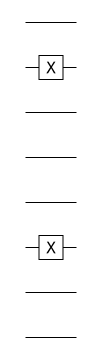

In [130]:
qc_encode = chain(8, put(2=>X), put(6=>X))
plot(qc_encode)

In [131]:
inpts = zero_state(8)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [132]:
inpts |> qc_encode

ArrayReg{2, ComplexF64, Array...}
    active qubits: 8/8
    nlevel: 2

In [133]:
res = inpts |> qc_encode -> measure(qc_encode, nshots=2048)

2048-element Vector{DitStr{2, 8, Int64}}:
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
            ⋮
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎
 00100010 ₍₂₎

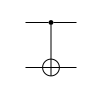

In [134]:
qc_cnot = chain(2, control(1,2=>X))
plot(qc_cnot)

In [146]:
inpts = ArrayReg(bit"01")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [147]:
inpts |> qc_cnot 

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [148]:
res = inpts |> qc_cnot -> measure(qc_cnot, nshots=2048)

2048-element Vector{DitStr{2, 2, Int64}}:
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
      ⋮
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎

┌ Warning: lims should be a Tuple, not UnitRange{Int64}.
└ @ Plots ~/.julia/packages/Plots/modjX/src/args.jl:1952


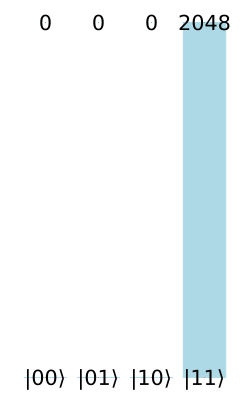

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:4
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:2048
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:4
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = 0:2048
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = 0:4
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vec

In [149]:
plotmeasures(res)